In [1]:
!pip install pyforest

In [2]:
import pyforest
import math
import pandas as pd

In [3]:
# Loading dataset

In [4]:
data=pd.read_csv('C:/Users/NAMRATA/Downloads/ToyotaCorolla.csv', encoding='Windows-1252')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
# considering only required column

In [6]:
d=data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
d

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
#NO NaN values

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
# There are no independent varibles with high correlation

In [10]:
d.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

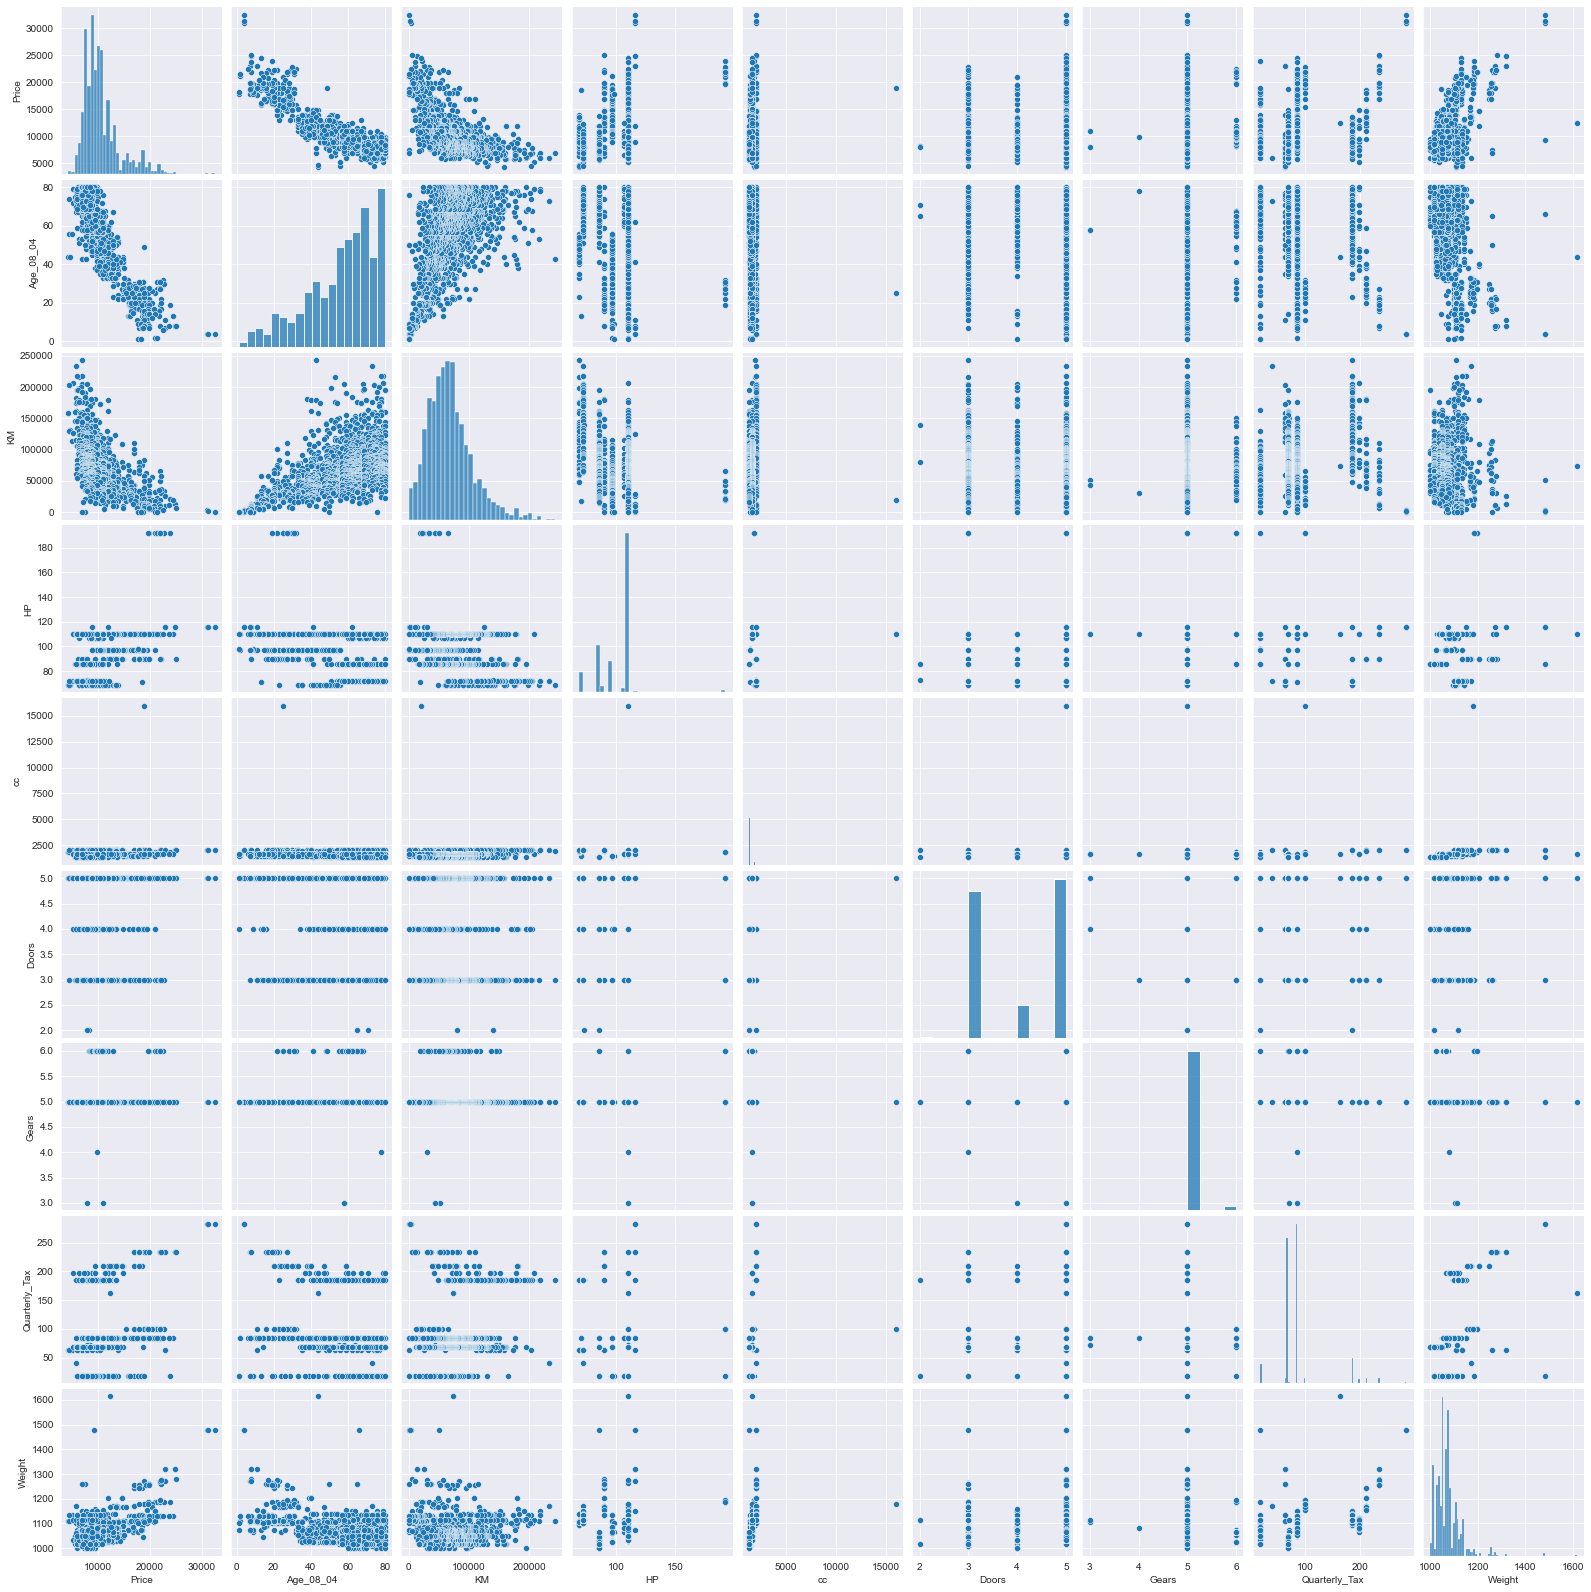

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(d)

In [12]:
# Building regression model for prediction of price

In [13]:
import statsmodels.formula.api as smf
model1=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=d).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:32:48   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# p values
# cc and Doors have p values>0.05

In [15]:
model1.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [16]:
# rsquared,adj.rsquared and aic values

In [17]:
model1_values=(model1.rsquared,model1.rsquared_adj,model1.aic)
model1_values

(0.8637627463428192, 0.8629989775766963, 24769.07664007625)

In [18]:
'''
Here rsquared value is 0.86 which indicates the model we build is good ,but we can improve the model by
model deletion diagnostics by removing influencers and outliers in our data using cooks distances.
we can also try to reduce AIC value,lesser the aic value better the model.
'''

'\nHere rsquared value is 0.86 which indicates the model we build is good ,but we can improve the model by\nmodel deletion diagnostics by removing influencers and outliers in our data using cooks distances.\nwe can also try to reduce AIC value,lesser the aic value better the model.\n'

In [19]:
# checking the signigicance of cc and Doors variables individually by simple reggression model
# it shows both are significant indivisually

In [20]:
slr_model1=smf.ols("Price~cc",data=d).fit()
slr_model1.pvalues

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

In [21]:
slr_model2=smf.ols("Price~Doors",data=d).fit()
slr_model2.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [22]:
model_cc_door=smf.ols("Price~cc+Doors",data=d).fit()
model_cc_door.pvalues

Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64

In [23]:
#Finding VIF values for each variable
# As the vif value of variables are < 10 ,we can say variables are good

In [24]:
rs_age=smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=d).fit().rsquared
vif_age=1/(1-rs_age)
rs_km=smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=d).fit().rsquared
vif_km=1/(1-rs_km)
rs_hp=smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=d).fit().rsquared
vif_hp=1/(1-rs_hp)
rs_cc=smf.ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=d).fit().rsquared
vif_cc=1/(1-rs_cc)
rs_doors=smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=d).fit().rsquared
vif_doors=1/(1-rs_doors)
rs_gears=smf.ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=d).fit().rsquared
vif_gears=1/(1-rs_gears)
rs_qtax=smf.ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Gears+Doors+Weight",data=d).fit().rsquared
vif_qtax=1/(1-rs_qtax)
rs_weight=smf.ols("Weight~Age_08_04+KM+HP+cc+Gears+Doors+Quarterly_Tax",data=d).fit().rsquared
vif_weight=1/(1-rs_weight)
vif={'variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qtax,vif_weight]}
vif_df=pd.DataFrame(vif)
vif_df

,variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [25]:
# QQlpot for residuals checking if there are following normal distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

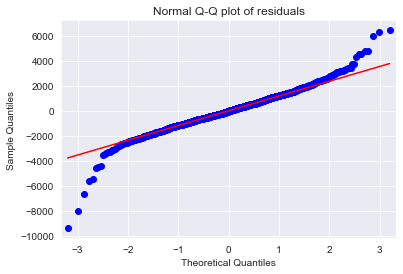

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
#data point which is far away from line(outlier)

In [28]:
list(np.where(model1.resid<-6000))

<IPython.core.display.Javascript object>

[array([221, 601, 960], dtype=int64)]

In [29]:
list(np.where(model1.resid>6000))

<IPython.core.display.Javascript object>

[array([147, 523], dtype=int64)]

In [30]:
# Residual Plot for finding weather there is Homoscedasticity or not

In [31]:
def get_standardized_values(vals):
    return(vals-vals.mean()).std()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

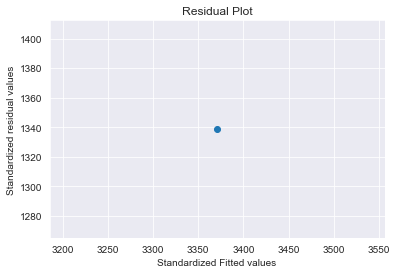

In [32]:
plt.scatter(get_standardized_values(model1.fittedvalues),get_standardized_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [33]:
# Residual VS Regressors plots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

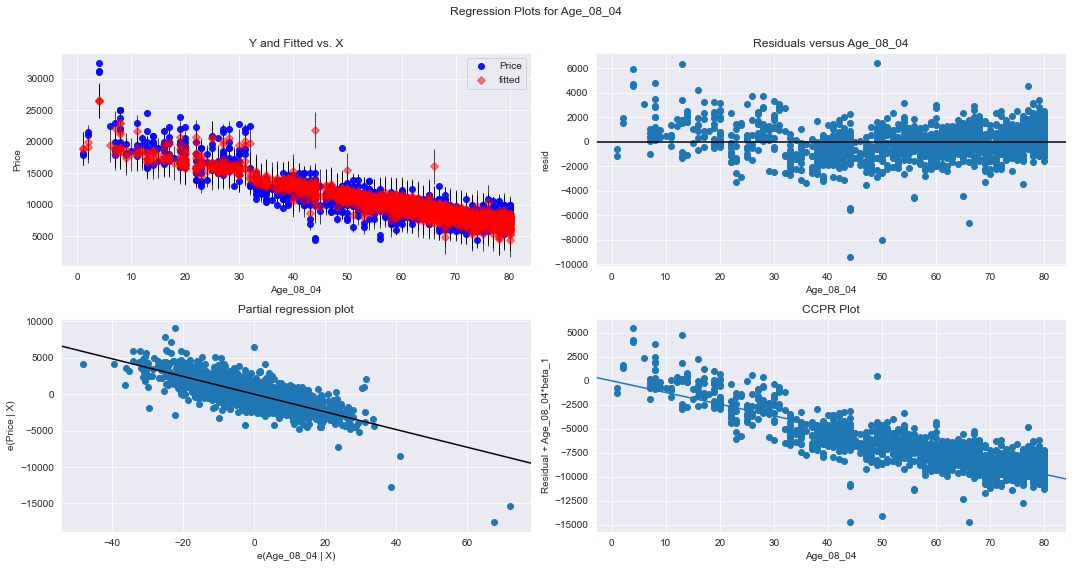

In [34]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Age_08_04",fig=fig)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

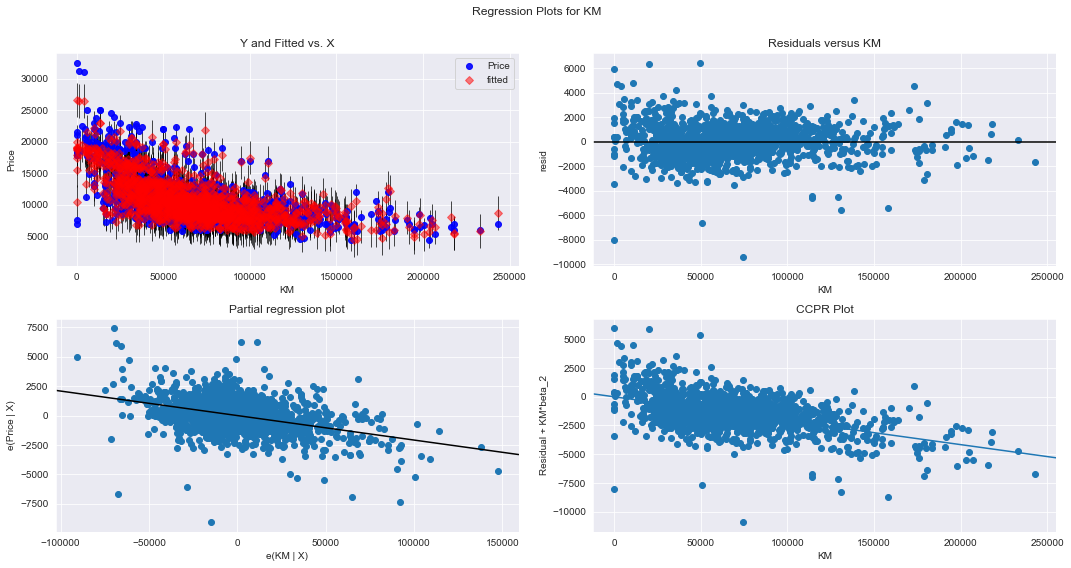

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"KM",fig=fig)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

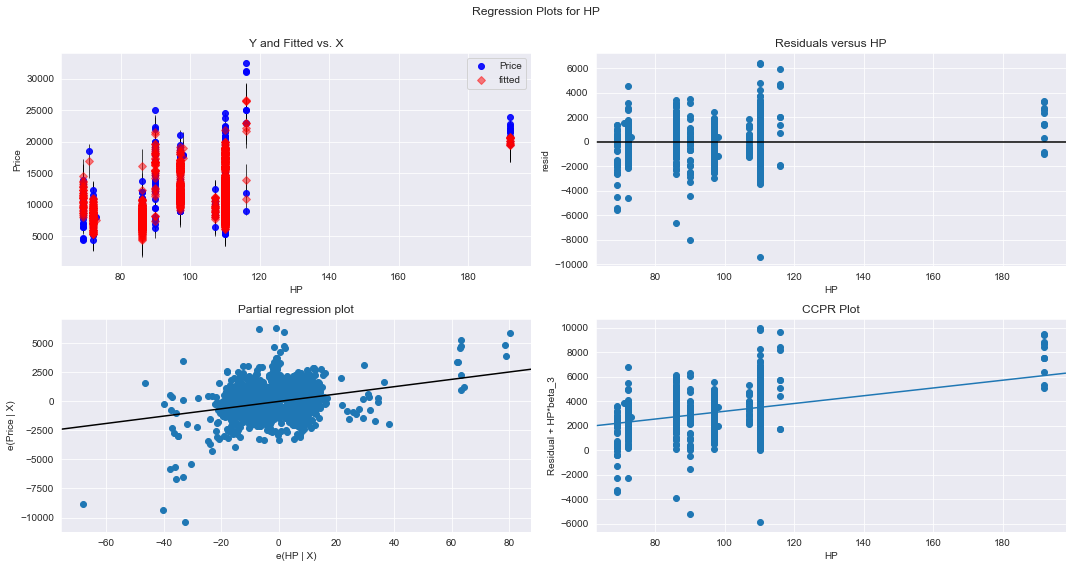

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"HP",fig=fig)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

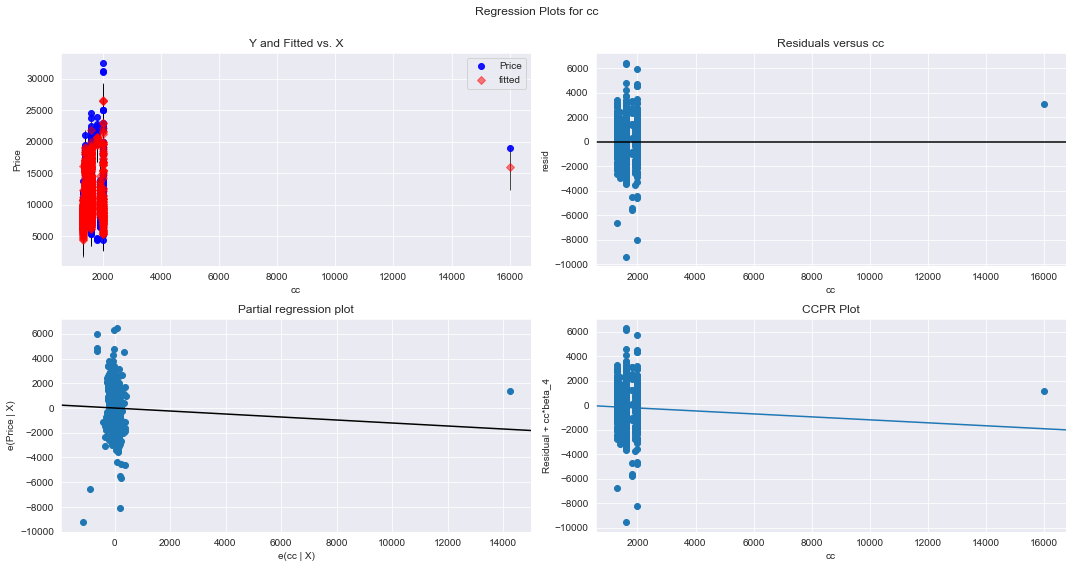

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"cc",fig=fig)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

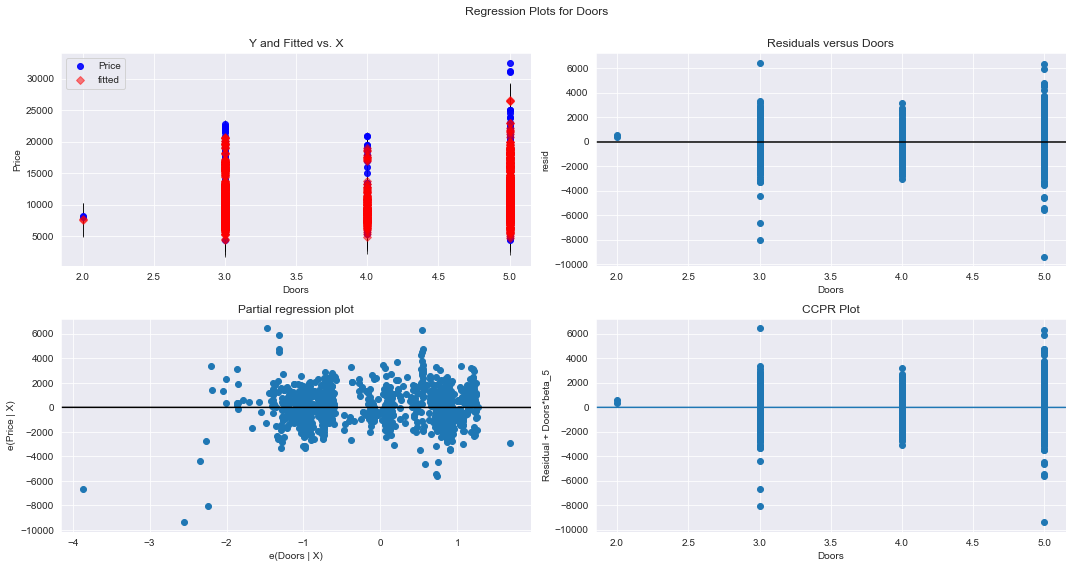

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Doors",fig=fig)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

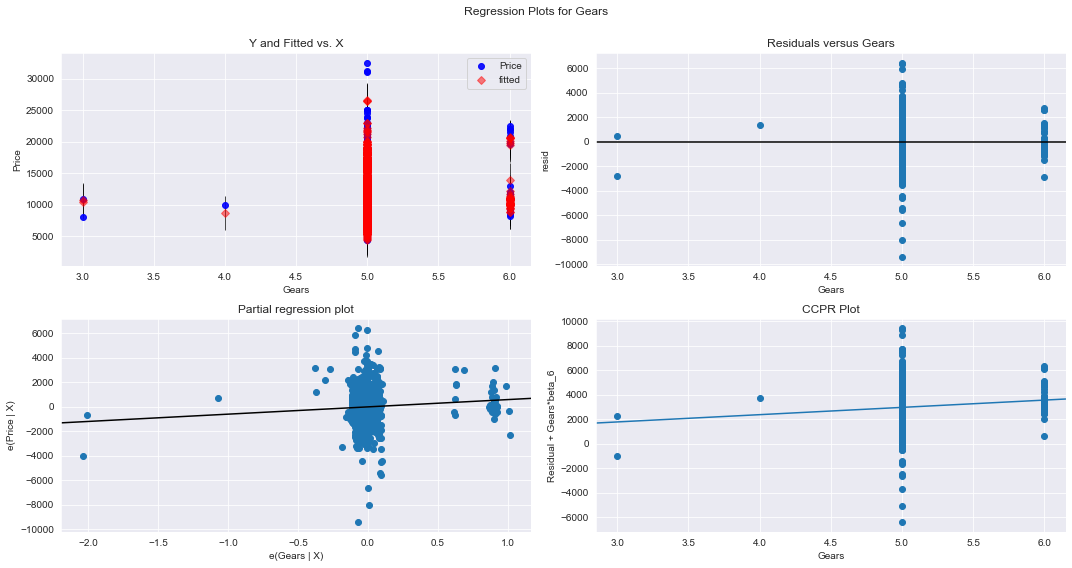

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Gears",fig=fig)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

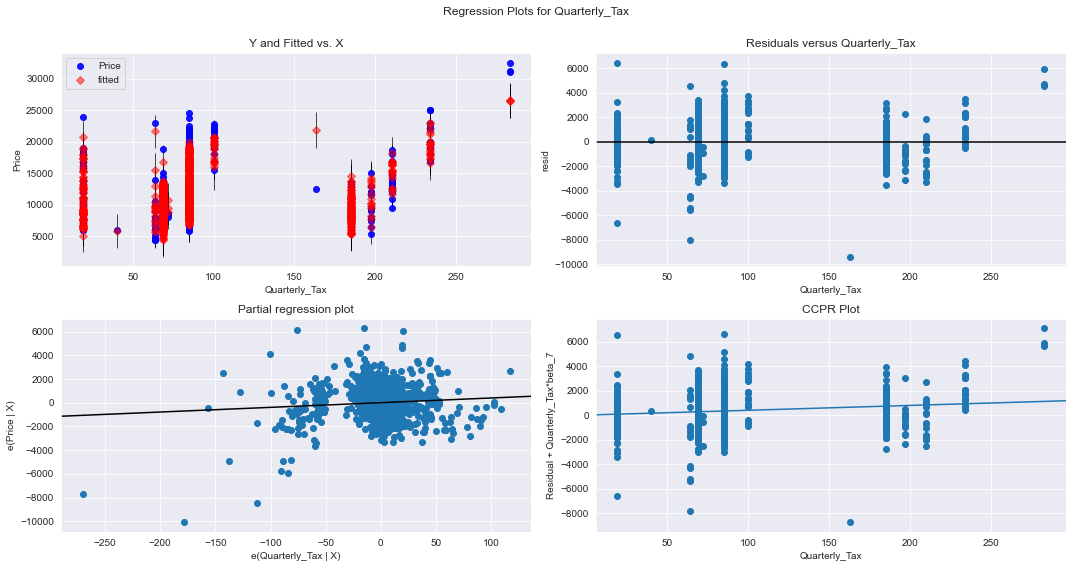

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Quarterly_Tax",fig=fig)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

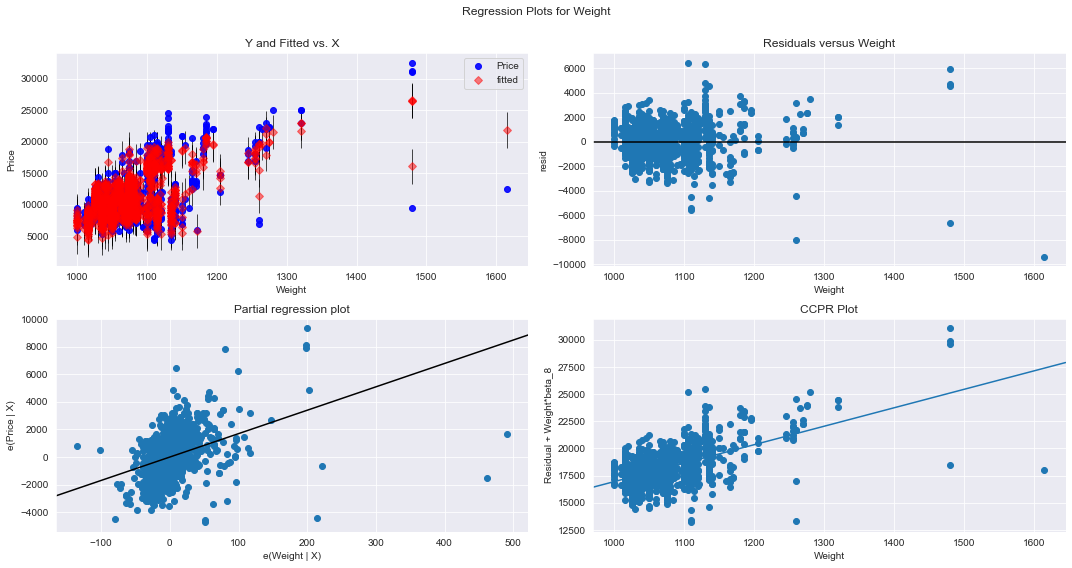

In [41]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Weight",fig=fig)
plt.show()

MODEL DELETION DIAGNOSTICS

In [42]:
#COOKS DISTANCE

In [43]:
model1_influence=model1.get_influence()
(p,_)=model1_influence.cooks_distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

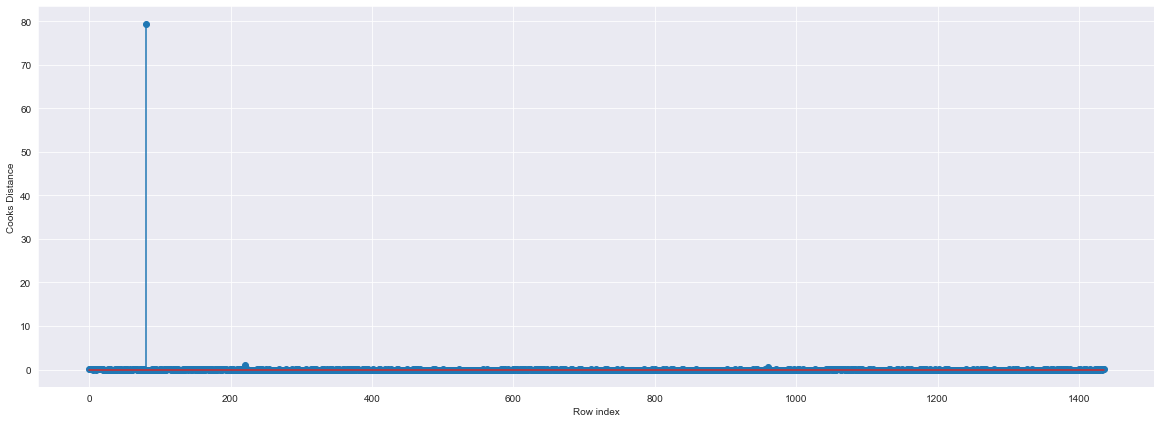

In [44]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(p)),np.round(p,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
# Influencing Data point

In [46]:
(np.argmax(p),np.max(p))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(80, 79.52010624139518)

In [47]:
# influencer plot

<IPython.core.display.Javascript object>

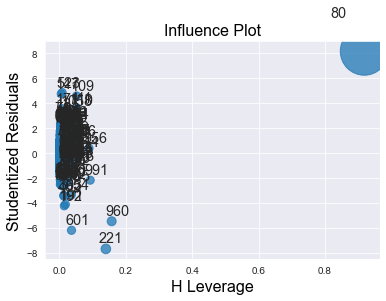

In [48]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [49]:
d[d.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [50]:
d=data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
d

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [51]:
d.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [52]:
# Droping the influencing Data points

In [53]:
d_drp=d.drop(d.index[80],axis=0).reset_index()
d_drp.tail()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015
1434,1435,6950,76,1,110,1600,5,5,19,1114


In [54]:
d_new=d_drp.drop(['index'],axis=1)
d_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [55]:
# Building reggresion model after removing most influencing Datapoints

In [56]:
model2=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=d_new).fit()
model2_values=(model2.rsquared,model2.rsquared_adj,model2.aic)
model2_values

(0.8693790488655818, 0.8686462525057814, 24687.28102432684)

In [57]:
# again checing for influencing point by cook's distance

In [58]:
model2_influence=model2.get_influence()
(d_new,_)=model2_influence.cooks_distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

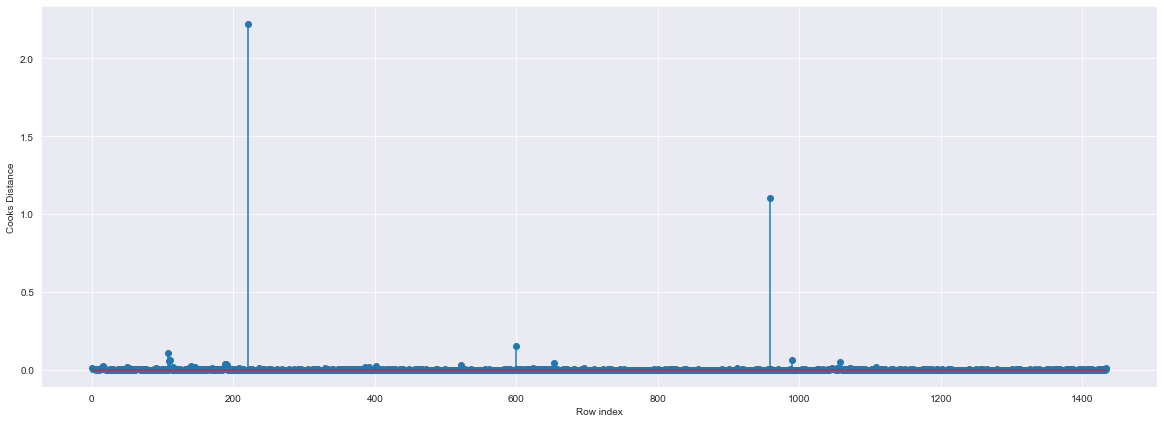

In [59]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(d_new)),np.round(d_new,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
#influencing datapoints

In [61]:
(np.argmax(d_new),np.max(d_new))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(220, 2.2244611713002116)

<IPython.core.display.Javascript object>

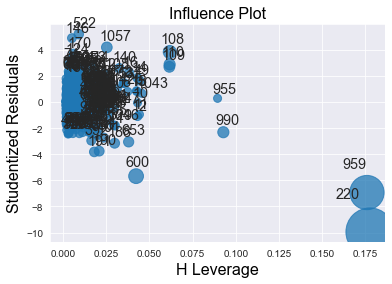

In [62]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [63]:
# from influencer plot we can see the most influencing points
# and droping all those datapoints

In [64]:
d_new2=d_drp.drop(d_drp.index[[220,959,599,652,988]],axis=0).reset_index()
d_new_2=d_new2.drop(['index'],axis=1)
d_new_2.tail()

,level_0,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1425,1430,7500,69,20544,86,1300,3,5,69,1025
1426,1431,10845,72,19000,86,1300,3,5,69,1015
1427,1432,8500,71,17016,86,1300,3,5,69,1015
1428,1433,7250,70,16916,86,1300,3,5,69,1015
1429,1434,6950,76,1,110,1600,5,5,19,1114


In [65]:
# again building the model.
#Here we got higher rsquared values and lower AIC value for this model

In [66]:
model3=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=d_new_2).fit()
model3_values=(model3.rsquared,model3.rsquared_adj,model3.aic)
model3_values

(0.8854170005144074, 0.8847719167734611, 24418.51226038807)

In [67]:
model_final=model3
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1373.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:33:01   Log-Likelihood:                -12200.
No. Observations:                1430   AIC:                         2.442e+04
Df Residuals:                    1421   BIC:                         2.447e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.471e+04   1433.086    -10.265      0.000   -1.75e+04   -1.19e+04
Age_08_04      -111.9462      2.480    -45.149      0.000    -116.810    -107.082
KM               -0.0171      0.001    -14.240      0.000      -0.019      -0.015
HP               36.5922      2.746     13.324      0.000      31.205      41.980
cc               -3.7816      0.302    -12.511      0.000      -4.375      -3.189
Doors          -123.8425     37.522     -3.301      0.001    -197.447     -50.238
Gears           463.3400    180.987      2.560      0.011     108.309     818.371
Quarterly_Tax     5.2372      1.371      3.819      0.000       2.547       7.927
Weight           30.6073      1.290     23.719      0.000      28.076      33.139
==============================================================================
Omnibus:                      122.036   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.524
Skew:                          -0.083   Prob(JB):                    1.40e-154
Kurtosis:                       6.444   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

predicting for test data

In [68]:
# taking test data from training dataset

In [69]:
test_data=d.iloc[200:1023,1:]
test_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
200,44,96829,110,1600,5,5,85,1075
201,40,96518,97,1400,3,5,69,1025
202,42,92204,110,1600,5,5,85,1075
203,35,91456,69,1900,3,5,185,1110
204,43,89968,69,1900,5,5,185,1140
...,...,...,...,...,...,...,...,...
1018,57,35000,86,1300,5,5,69,1045
1019,64,34114,110,1600,3,5,69,1050
1020,58,34000,110,1600,5,5,85,1075
1021,68,33847,86,1300,4,5,69,1000


In [70]:
acct_values=d.iloc[200:1023,0].values
acct_values

array([11495, 11250, 10500, 10450, 12950, 11500, 12500, 10950, 11450,
       11950, 13250, 14750, 11790, 11450, 13500, 10950, 13500, 10950,
       10950, 12950, 11950, 12450, 11950, 14950, 12450, 12950, 11950,
       11690, 12450, 12750, 11925, 12950, 11950, 12900, 11900, 11650,
       10950, 13950, 13950, 11950, 10950, 12450, 11950, 13500, 11690,
       13500, 11950, 12900, 13500, 11750, 11750, 10850, 11750, 14950,
        9940, 12900, 13500, 11750, 11950, 13450, 11950, 12495, 13500,
       12750, 12000, 11950, 12495, 12450, 14750, 10950, 13500, 12950,
       13500, 13450, 13500, 11480, 13450, 11495, 12750, 14990, 12950,
       12950, 12850, 13950, 11950, 12950, 11700,  9950, 11895, 12950,
       12500, 13875, 10500, 12295, 13950, 10950, 12950, 12850, 13995,
       13750, 12750, 12500, 13950, 11500, 13950, 11895,  9950, 13500,
       11450, 12450, 12950, 13995, 11750, 11650,  9950, 13950, 12950,
       10950,  9900, 11950, 11990, 10750, 13950, 11250, 12950, 11950,
       10950, 12950,

In [71]:
# predicted values for test datasets

In [72]:
pred_values_final=model_final.predict(test_data).values
pred_values_final

array([11725.56221701, 11092.82278828, 12028.66537972, 12032.99087925,
       11833.44078541, 11092.35228589, 12369.2759118 , 11861.3241091 ,
       12428.81178032, 14744.93107269, 12209.10957551, 14843.39869589,
       14074.12715059, 12488.54592104, 14843.13284549, 13291.07712488,
       12373.71127893, 11337.47062664, 11016.20681695, 12782.76035102,
       12223.61167201, 29050.05878833, 12588.30193458, 12619.89107566,
       13172.01697184, 12894.32336656, 12353.9148061 , 13205.75539392,
       12655.08272036, 13014.16386679, 11211.36502421, 13207.82186383,
       11625.13350883, 11917.27669752, 12675.03164691, 13013.79889564,
       12347.75638213, 11946.59356322, 13444.70298557, 12975.05563596,
       13048.58312722, 12691.57151911, 11743.44550921, 15039.42851952,
       13634.50076436, 12984.54017772, 12047.97380792, 11652.79001553,
       12850.74122437, 12658.99470486, 13667.36681085, 11223.46775896,
       12574.91357173, 13606.00457181, 12679.25499137, 12694.10434285,
      

ROOT MEAN SQUARE ERROR(RMSE)

In [73]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
mse=sklearn.metrics.mean_squared_error(acct_values,pred_values_final)
rmse=math.sqrt(mse)
rmse

<IPython.core.display.Javascript object>

1365.3149351188003

R suared and AIC values for all the models

In [74]:
model_values_df=pd.DataFrame({'model 1':model1_values,'model 2':model2_values,'Final Model':model3_values},index=['rsquared','rsquared_adj','AIC'])
model_values_df

,model 1,model 2,Final Model
rsquared,0.863763,0.869379,0.885417
rsquared_adj,0.862999,0.868646,0.884772
AIC,24769.076640,24687.281024,24418.512260


In [75]:
'''
Here we can see that r-suared values is higher than AIC value is lesser for final model by which we can say that model is better tahn the previous models.
'''

'\nHere we can see that r-suared values is higher than AIC value is lesser for final model by which we can say that model is better tahn the previous models.\n'